<h1>01 - Random Mostly Sparse Matrices</h1>

In [1]:
import numpy as np

<h2>Define Distributions for s's</h2>

In [2]:
class RandomMatDist:
    def __init__(self,f,u):
        self.f = f
        self.u = u
     
    def sample(self,shape):
        @np.vectorize
        def _transform(x):
            if x < self.f:

                return (1 - self.u/2) + (self.u*x)/self.f
            if x >= self.f:

                return (-1 - self.u/2) + (self.u*(x-self.f))/(1-self.f)
        
        x = np.random.rand(*shape)
        return _transform(x)

In [3]:
import scipy.sparse as sparse

create sparse matrix as defined in eqn 1

In [4]:
def get_matrix(N,f,u,g):
    dist = RandomMatDist(f,u)
    ssss = dist.sample((N,2))
    inds = np.arange(0,N)
    mat1 = sparse.csr_matrix((ssss[:,0] * np.exp(g), (inds, (inds+1) % N)), shape=(N, N))
    mat2 = sparse.csr_matrix((ssss[:,1] *np.exp(-g), ((inds+1) % N, inds)), shape=(N, N))
    return mat1 + mat2

In [5]:
matrix = get_matrix(N=500,f=0.75,u=0.5,g=0.1)

In [6]:
import scipy.linalg

<h2>Average many Random Matrices</h2>

In [7]:
# lambs = np.array([])
# for iteration in range(10):
#     matrix = get_matrix(N=500,f=0.75,u=0.5,g=0.1)
#     temp, vecs = scipy.sparse.linalg.eigs(matrix)
#     lambs = np.concatenate((lambs,temp))

<h2>Create Fig 1</h2>

In [9]:
import matplotlib.pyplot as plt
import matplotlib

In [10]:

# font = {'family' : 'normal',
#         'size'   : 10}

# matplotlib.rc('font', **font)
fsize= 15
tsize = 16
plt.rcParams['font.size'] = fsize
plt.rcParams['legend.fontsize'] = tsize

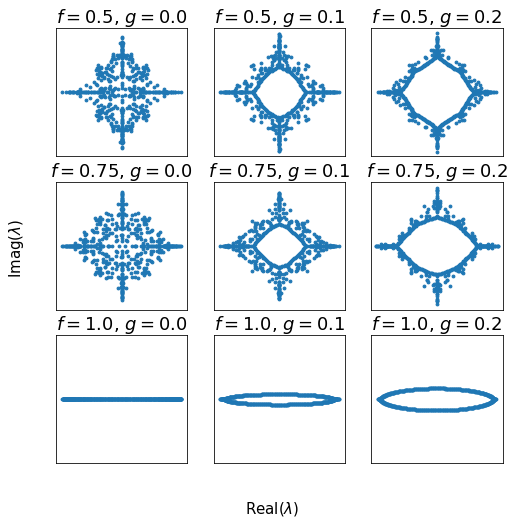

In [22]:
fs = np.array([0.5,0.75,1.0])
gs = np.array([0.0,0.1 ,0.2])
fig, axs = plt.subplots(len(fs), len(gs),figsize=(8, 8))
for i,f in enumerate(fs):
    for j,g in enumerate(gs):
        matrix = get_matrix(N=500,f=f,u=0.5,g=g)
        lambs, vecs = scipy.linalg.eig(matrix.todense())
        axs[i,j].set_title('$f = {}$, $g = {}$'.format(f,g))
        axs[i,j].scatter(lambs.real,lambs.imag,s=8)
        axs[i,j].axis('equal')
        axs[i,j].set_xticks([])
        axs[i,j].set_yticks([])
# plt.xlabel('Real($\lambda$)')
fig.text(0.5, 0.04, 'Real($\lambda$)', ha='center')
fig.text(0.04, 0.5, 'Imag($\lambda$)', va='center', rotation='vertical')
# fig.suptitle('Eigenvalues ')
plt.savefig('../figures/fig1.png',dpi=300)
plt.show()

<h2>Create Fig 2</h2>

In [12]:
matrix = get_matrix(N=200,f=1.0,u=0.5,g=0.0)
lambs, vecs = scipy.linalg.eig(matrix.todense())

In [13]:
ordered_inds = np.argsort(lambs.real)
vecs_sp = vecs[:,ordered_inds[:3]]

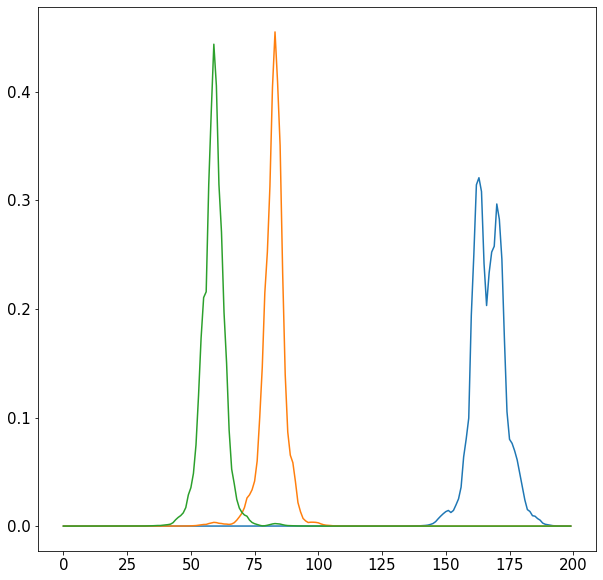

In [14]:
fig, ax = plt.subplots(1,figsize=(10,10))
ax.plot(np.abs(vecs_sp))
# plt.savefig('')
plt.show()

In [15]:
class BetaPrimeDist:
    def __init__(self,beta,w):
        self.beta = beta
        self.w    = w
     
    def sample(self,shape):
        x = (np.random.rand(*shape) * self.w) + (self.beta - self.w/2)
        return x

In [16]:
def get_J_matrix(N,u,w,g=0.0,f=1.0,alpha=1.0,beta=1.0,gamma=1.0):
    dist = RandomMatDist(f=f,u=u)
    ssss = dist.sample((N,2))
    inds = np.arange(0,N)
    mat1 = sparse.csr_matrix((ssss[:,0] * np.exp(g), (inds, (inds+1) % N)), shape=(N, N))
    mat2 = sparse.csr_matrix((ssss[:,1] *np.exp(-g), ((inds+1) % N, inds)), shape=(N, N))
    neig = alpha * (mat1 + mat2)
    
    idnt = gamma * sparse.eye(N)
    
    betp = BetaPrimeDist(beta=beta,w=w)
    inhb = betp.sample((N,N))
    inhb[inds,inds] = 0.0
    
    return neig + idnt - inhb

optimize the distributions or values of matrices with respect to localization length

<h3>part b</h3>

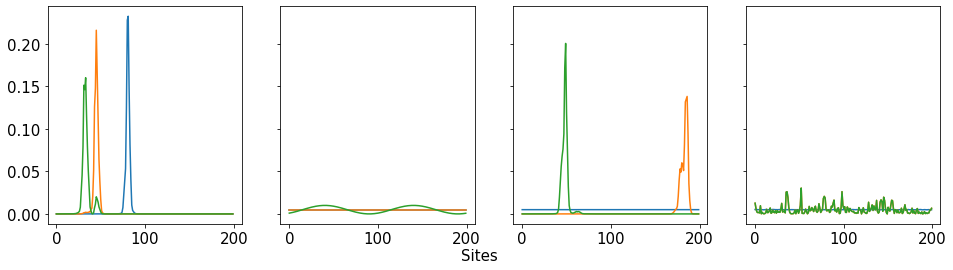

In [21]:
parameters = [{'u'    :0.5
              ,'w'    :0.0
              ,'alpha':1.0
              ,'beta' :0.0
              ,'gamma':0.0}
              
             ,{'u'    :0.0
              ,'w'    :0.0
              ,'alpha':1.0
              ,'beta' :1.0
              ,'gamma':1.0}
              
             ,{'u'    :0.5
              ,'w'    :0.0
              ,'alpha':1.0
              ,'beta' :1.0
              ,'gamma':1.0}
              
             ,{'u'    :0.5
              ,'w'    :0.5
              ,'alpha':1.0
              ,'beta' :1.0
              ,'gamma':1.0}]


fig, axs = plt.subplots(1,4,figsize=(16,4),sharex=True,sharey=True)

fig.text(0.5, 0.00, 'Sites', ha='center')
# fig.suptitle('Greatest Eigenvectors')

for i,param in enumerate(parameters):
    matrix = get_J_matrix(N=200,**param)
    lambs, vecs = scipy.linalg.eig(matrix)

    ordered_inds = np.argsort(lambs.real)
    vecs_sp = vecs[:,ordered_inds[:3]]

#     axs[i//2,i%2].set_title(r'$\alpha = {}$, $\beta = {}$, $\gamma = {}$, $u = {}$, w = {}'.format(
#         param['alpha'],param['beta'],param['gamma'],param['u'],param['w']))
    axs[i].plot(np.abs(vecs_sp)**2)
plt.savefig('../figures/fig2.png',dpi=300)
plt.show()

In [ ]:
matrix = get_J_matrix(N=200,u=0.5,w=0.0,alpha=1.0,beta=0.0,gamma=0.0)
lambs, vecs = scipy.linalg.eig(matrix)

ordered_inds = np.argsort(lambs.real)
vecs_sp = vecs[:,ordered_inds[:3]]

fig, ax = plt.subplots(1,figsize=(10,10))
ax.plot(np.abs(vecs_sp)**2)
plt.savefig('../figures/fig2b.png')
plt.show()

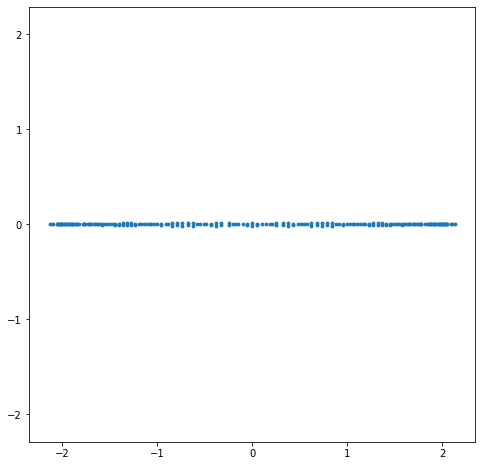

In [16]:
fig, ax = plt.subplots(1,figsize=(8,8))
ax.scatter(lambs.real,lambs.imag,s=8)
ax.axis('equal')
plt.show()

<h3>part c</h3>

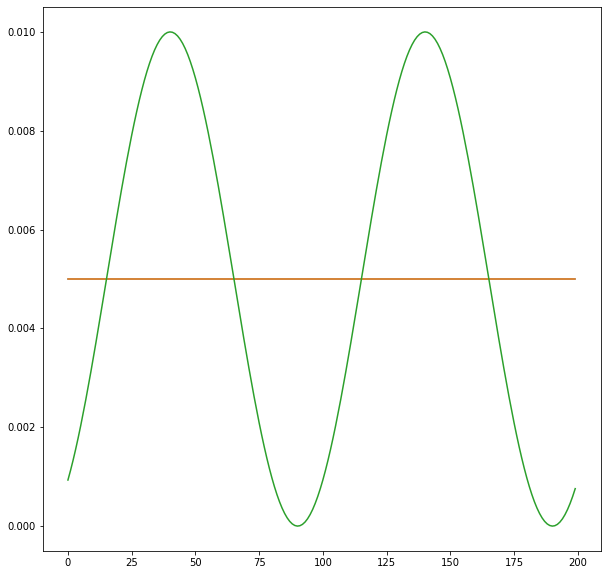

In [17]:
matrix = get_J_matrix(N=200,u=0.0,w=0.0,alpha=1.0,beta=1.0,gamma=1.0)
lambs, vecs = scipy.linalg.eig(matrix)

ordered_inds = np.argsort(lambs.real)
vecs_sp = vecs[:,ordered_inds[:3]]

fig, ax = plt.subplots(1,figsize=(10,10))
ax.plot(np.abs(vecs_sp)**2)
plt.savefig('../figures/fig2c.png')
plt.show()

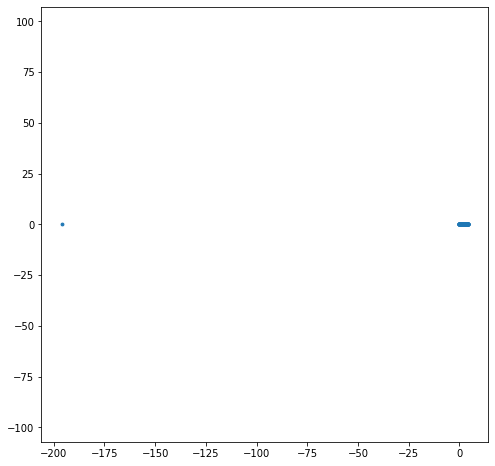

In [18]:
fig, ax = plt.subplots(1,figsize=(8,8))
ax.scatter(lambs.real,lambs.imag,s=8)
ax.axis('equal')
plt.show()

<h3>part d</h3>

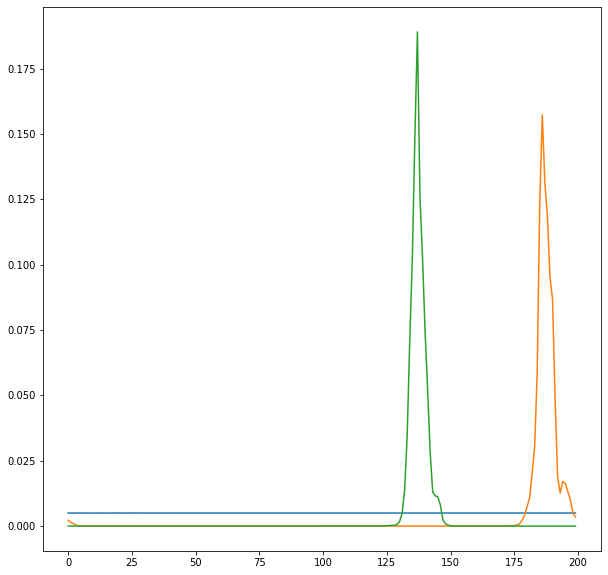

In [19]:
matrix = get_J_matrix(N=200,u=0.5,w=0.0,alpha=1.0,beta=1.0,gamma=1.0)
lambs, vecs = scipy.linalg.eig(matrix)

ordered_inds = np.argsort(lambs.real)
vecs_sp = vecs[:,ordered_inds[:3]]

fig, ax = plt.subplots(1,figsize=(10,10))
ax.plot(np.abs(vecs_sp)**2)
plt.savefig('../figures/fig2d.png')
plt.show()

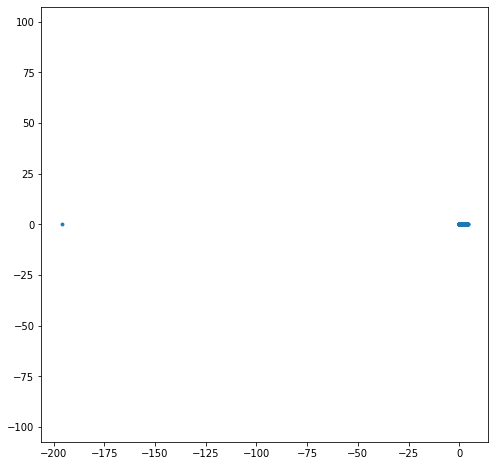

In [20]:
fig, ax = plt.subplots(1,figsize=(8,8))
ax.scatter(lambs.real,lambs.imag,s=8)
ax.axis('equal')
plt.show()

<h3>part e</h3>

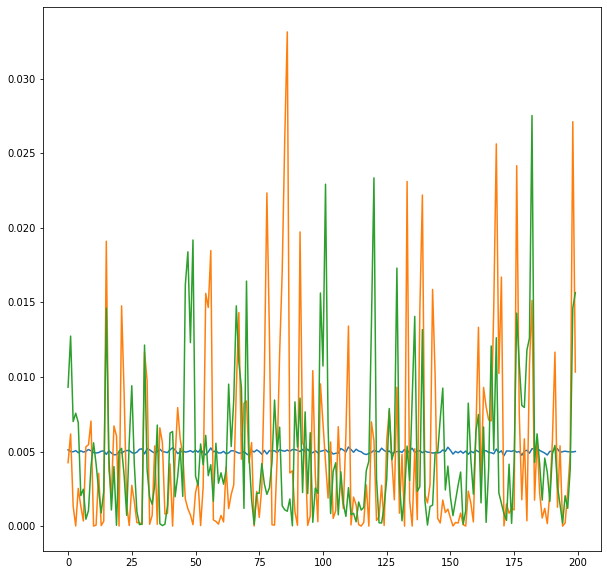

In [21]:
matrix = get_J_matrix(N=200,u=0.5,w=0.5,alpha=1.0,beta=1.0,gamma=1.0)
lambs, vecs = scipy.linalg.eig(matrix)

ordered_inds = np.argsort(lambs.real)
vecs_sp = vecs[:,ordered_inds[:3]]

fig, ax = plt.subplots(1,figsize=(10,10))
ax.plot(np.abs(vecs_sp)**2)
plt.savefig('../figures/fig2e.png')
plt.show()

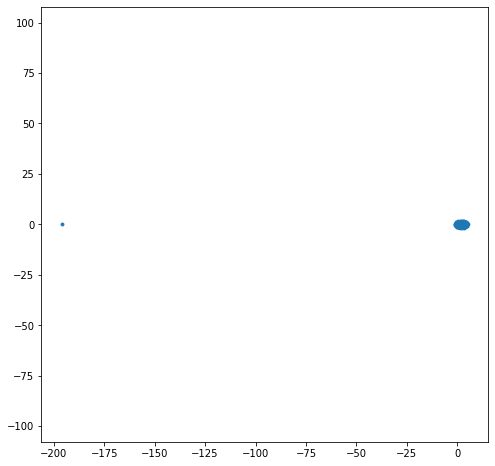

In [22]:
fig, ax = plt.subplots(1,figsize=(8,8))
ax.scatter(lambs.real,lambs.imag,s=8)
ax.axis('equal')
plt.show()

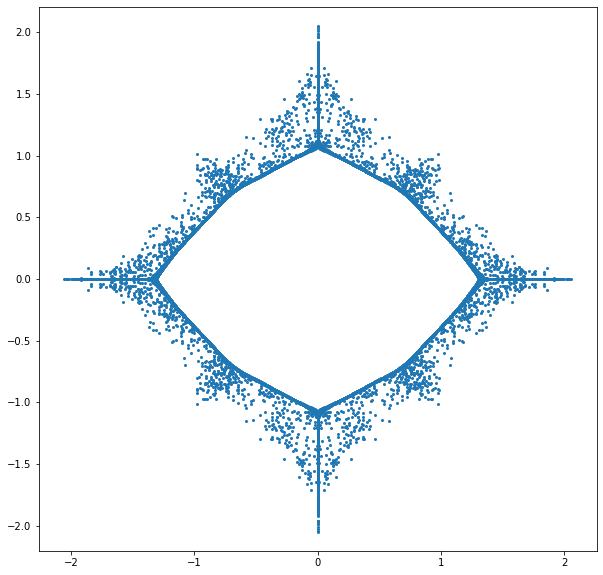

In [23]:
fig, ax = plt.subplots(1,figsize=(10, 10))
matrix = get_matrix(N=10000,f=0.7,u=0.5,g=0.2)
lambs, vecs = scipy.linalg.eig(matrix.todense())
ax.scatter(lambs.real,lambs.imag,s=4)
ax.axis('equal')
plt.savefig('../figures/big.png')
plt.show()